Consier Baysian Linear Regression. 

$y = \beta x + \epsilon, \epsilon \sim N(0,\sigma),$

where $\beta$ are the latent variable and $x,y$ are observed.

Assume, mean field variational inference, i.e. $\beta$ are coordinatewise independent.

Start with initial distribution $\beta \sim N(0,\mathbb{I})$, deduce updating method for $\sigma$.

In [19]:
import numpy as np

s = 0.5

N = 1000
d = 2

beta_seed = np.random.randn(d)
Sigma = np.diag(np.random.rand(d))
Mu = np.random.randn(d)
beta = Sigma @ beta_seed + Mu

X = np.random.randn(N,d)
epsilon = s * np.random.randn(N)
y = X @ beta + epsilon

print(s,Mu,Sigma,beta,sep='\n')

0.5
[-0.19535353  1.80246948]
[[0.73918404 0.        ]
 [0.         0.50693955]]
[-0.10978461  1.19673614]


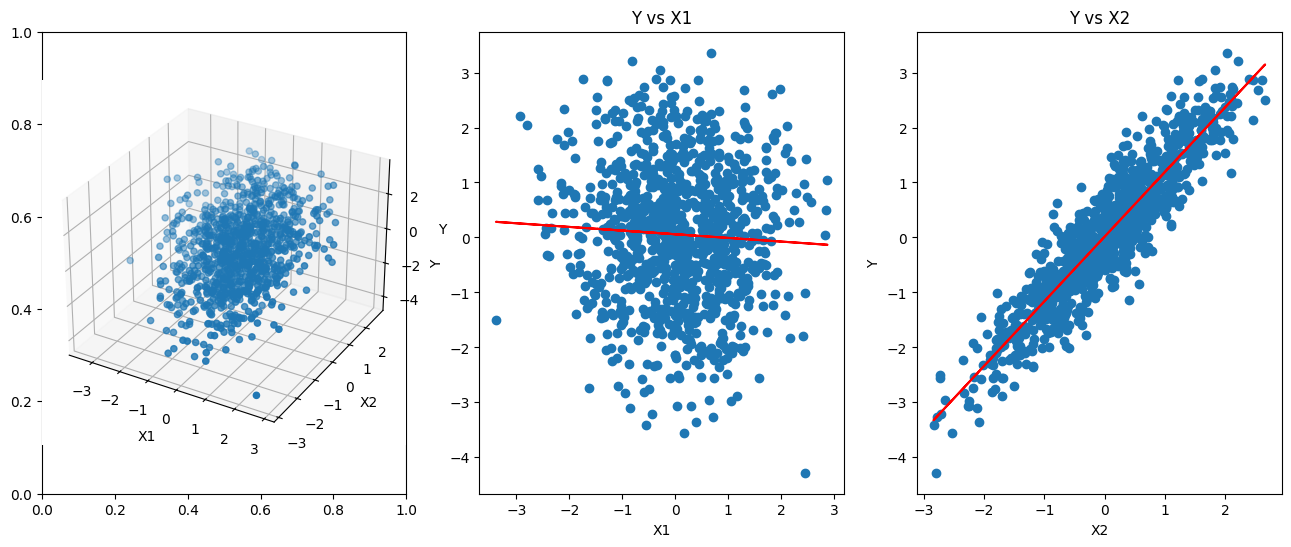

In [20]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Fit linear regression line for X1 vs Y
coeffs_X1 = np.polyfit(X[:, 0], y, 1)
line_X1 = np.polyval(coeffs_X1, X[:, 0])
ax2.plot(X[:, 0], line_X1, color='red')
ax2.scatter(X[:, 0], y)
ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
ax2.set_title('Y vs X1')

# Fit linear regression line for X2 vs Y
coeffs_X2 = np.polyfit(X[:, 1], y, 1)
line_X2 = np.polyval(coeffs_X2, X[:, 1])
ax3.plot(X[:, 1], line_X2, color='red')
ax3.scatter(X[:, 1], y)
ax3.set_xlabel('X2')
ax3.set_ylabel('Y')
ax3.set_title('Y vs X2')

plt.show()

In [21]:
initial = [np.zeros(d),np.eye(d),1]
iterations = [initial]

for i in range(N):
    tMu,tSigma,tsigma = iterations[-1]

    err = y - X @ tMu
    tMu = np.mean(err.reshape(-1,1) * X,0) / tsigma ** 2
    tSigma = np.diag(1 / ( 1+ np.mean(X * X,0) / tsigma ** 2) ** 0.5)

    v_Sigma = np.diag(tSigma)
    err = y - X @ tMu
    tsigma = np.mean(err ** 2 + ((X*X) @ (v_Sigma * v_Sigma))) ** 0.5

    iterations.append([tMu,tSigma,tsigma])


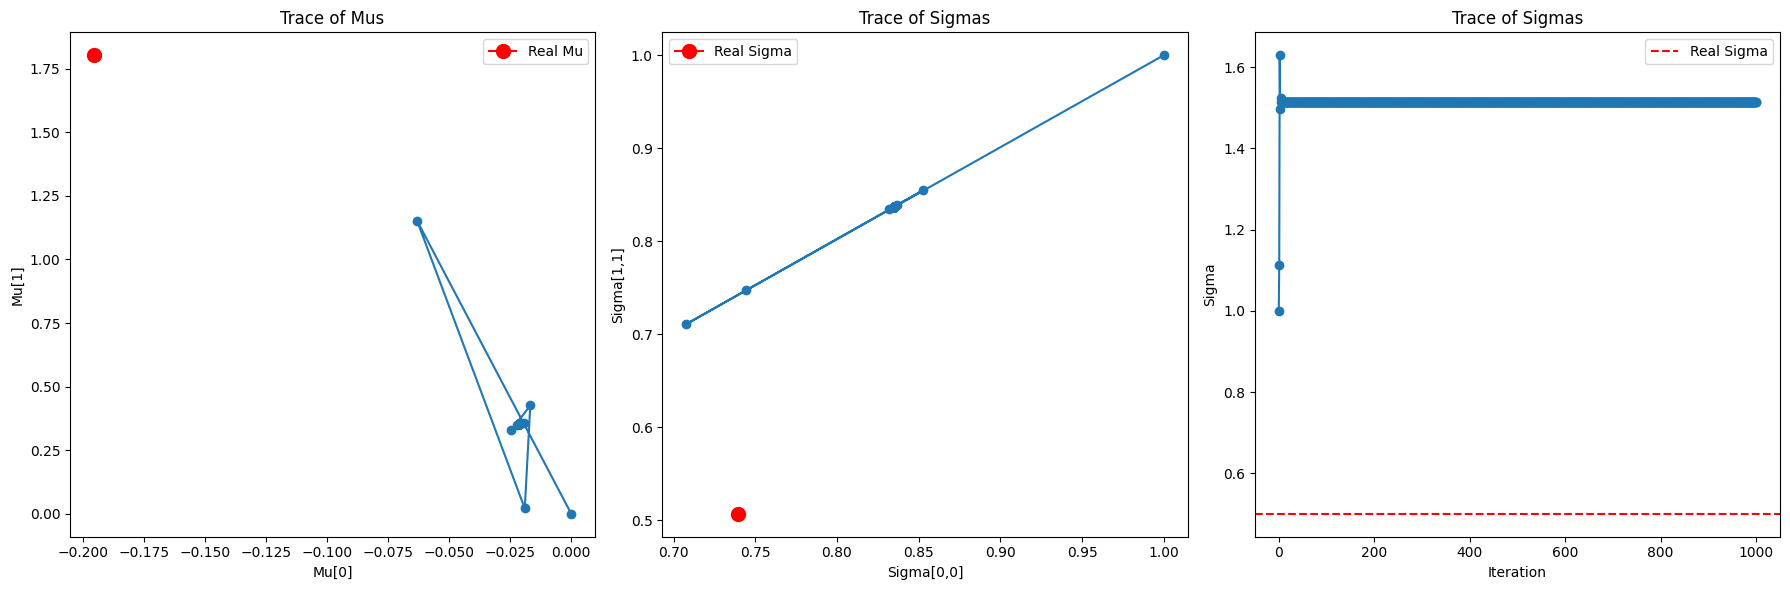

In [22]:
Mus,Sigmas,sigmas = zip(*iterations)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot trace of Mus
Mus = np.array(Mus)
ax1.plot(Mus[:, 0], Mus[:, 1], marker='o')
ax1.set_xlabel('Mu[0]')
ax1.set_ylabel('Mu[1]')
ax1.set_title('Trace of Mus')
ax1.plot(Mu[0], Mu[1], marker='o', color='red', markersize=10, label='Real Mu')
ax1.legend()

# Plot trace of Sigmas
Sigmas_diag = np.array([np.diag(Sigma) for Sigma in Sigmas])
ax2.plot(Sigmas_diag[:, 0], Sigmas_diag[:, 1], marker='o')
ax2.set_xlabel('Sigma[0,0]')
ax2.set_ylabel('Sigma[1,1]')
ax2.set_title('Trace of Sigmas')
ax2.plot(np.diag(Sigma)[0], np.diag(Sigma)[1], marker='o', color='red', markersize=10, label='Real Sigma')
ax2.legend()

# Plot trace of sigmas
ax3.plot(sigmas, marker='o')
ax3.axhline(y=s, color='red', linestyle='--', label='Real Sigma')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Sigma')
ax3.set_title('Trace of Sigmas')
ax3.legend()

plt.tight_layout()
plt.show()
